In [1]:

# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import glob 

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth
from astropy.nddata import CCDData
from tqdm import tnrange

from matplotlib.colors import LogNorm

#from IPython.display import display, Markdown, clear_output

import inspect
import importlib
import warnings
warnings.filterwarnings('ignore')

# Plot setup
matplotlib.rc('font', size=22, family='normal', weight='bold')
plt.rcParams['figure.figsize'] = [10, 4]
np.printoptions(suppress=True)

In [2]:
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import imagehandler
importlib.reload(imagehandler)
import glob
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::15][:30]
print(f"{len(filenames)} files")
print(' '.join(filenames))

30 files
/arc/home/mikea/.shifty_data/tess/5/1/4/tess2018319225938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018320062938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018320135938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018320212938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018321045938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018321122938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018321195938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018322032938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018322105938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018322205938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018323042938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess201832311593

Reading image 29: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018329042938-s0005-1-4-0125-s_ffic.fits
Read 30 files!
Combining images using median stacking.

Done!
Combining images using mean stacking


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.



Done!


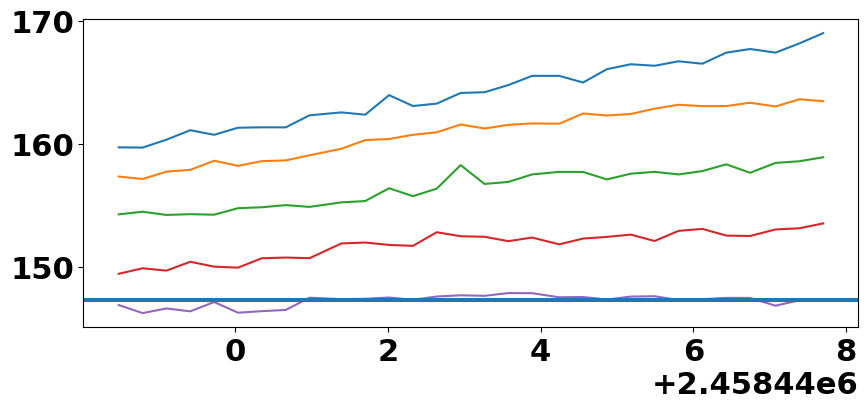

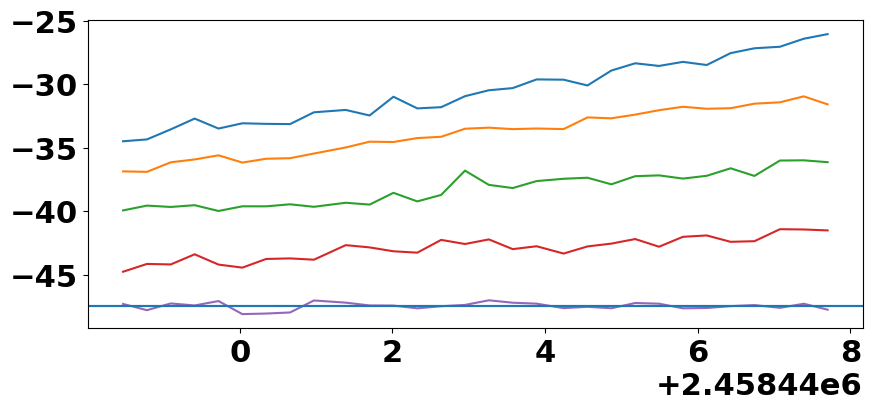

In [3]:
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
plt.figure()
plt.plot(times, [d[204,199] for d in D.image_data.data])
plt.plot(times, [d[406,368] for d in D.image_data.data])
plt.plot(times, [d[604,591] for d in D.image_data.data])
plt.plot(times, [d[803,796] for d in D.image_data.data])
plt.plot(times, [d[1019,1011] for d in D.image_data.data])
plt.axhline(np.mean([d[1019,1011] for d in D.image_data.data]))
plt.axhline(np.median([d[1019,1011] for d in D.image_data.data]))
for d in D.image_data.data:
    d -= np.mean(d)
plt.figure()
plt.plot(times, [d[204,199] for d in D.image_data.data])
plt.plot(times, [d[406,368] for d in D.image_data.data])
plt.plot(times, [d[604,591] for d in D.image_data.data])
plt.plot(times, [d[803,796] for d in D.image_data.data])
plt.plot(times, [d[1019,1011] for d in D.image_data.data])
plt.axhline(np.mean([d[1019,1011] for d in D.image_data.data]))
plt.axhline(np.median([d[1019,1011] for d in D.image_data.data]))
D.stack(shifted=False, median_combine=True)
D.save_stack(f'Tess_{len(times)}images-mean_stack_median.fits')
D.stack(shifted=False, median_combine=False)
D.save_stack(f'Tess_{len(times)}images-mean_stack_mean.fits')

<Figure size 1000x400 with 0 Axes>

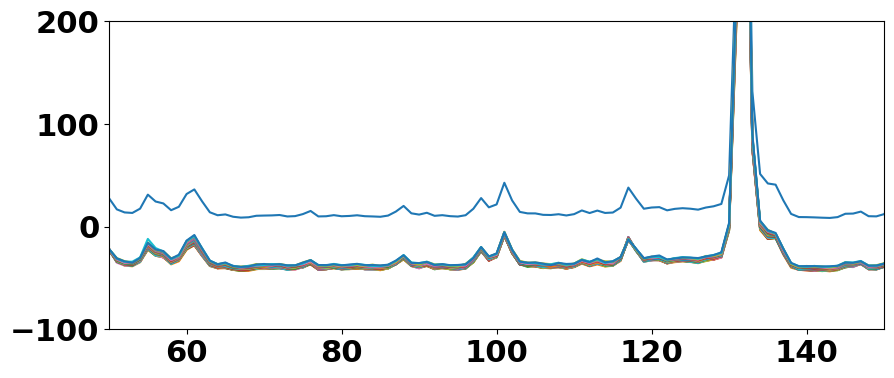

<Figure size 1000x400 with 0 Axes>

In [4]:
plt.figure()
plt.plot(D.stacked_data.data[1019]+50)
for d in D.image_data.data:
    plt.plot(d[1019])
plt.axis([50,150,-100,200])
plt.figure()

Reading image 29: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018329042938-s0005-1-4-0125-s_ffic.fits
Read 30 files!
Combining images using median stacking.

Done!
Combining images using mean stacking

Done!


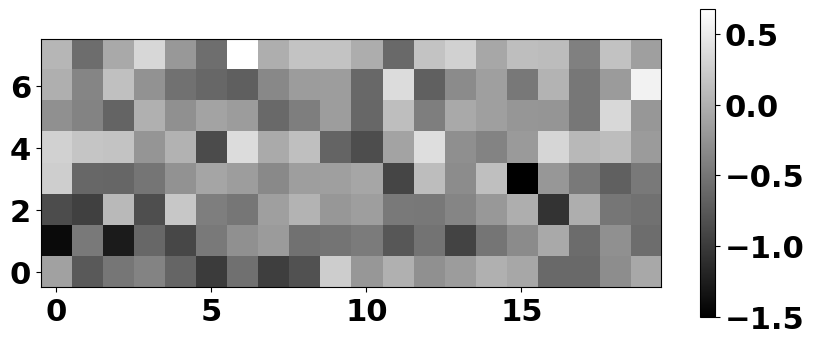

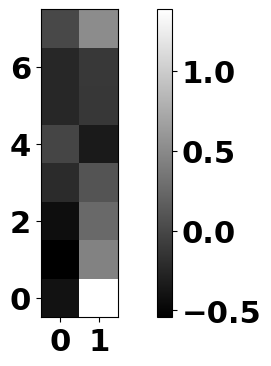

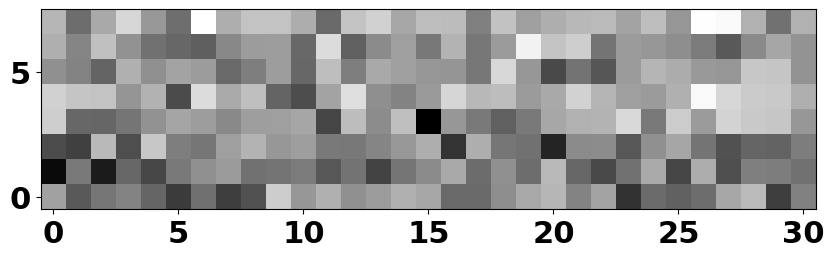

In [5]:
#%matplotlib widget
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
#plt.imshow(D.image_data.data[0], origin='lower', cmap='gray',norm=LogNorm())
#cbar = plt.colorbar()
new_data = D.image_data.data[:, 985:1015, 1060:1100]
new_data = D.image_data.data[:, 995:1003, 1079:1081]
D.image_data.data = new_data
for d in D.image_data.data:
    d -= np.mean(d)
plt.figure()
plt.imshow(np.array([d[:,0] for d in D.image_data.data]).T[:,:20], origin='lower', cmap='gray')
cbar = plt.colorbar()
D.stack(shifted=False, median_combine=True)
D.save_stack(f'Tess_{len(times)}images-mean_stack_median_cutout.fits')
D.stack(shifted=False, median_combine=False)
D.save_stack(f'Tess_{len(times)}images-mean_stack_mean_cutout.fits')
plt.figure()
plt.imshow(D.stacked_data.data, origin='lower', cmap='gray')
bar = plt.colorbar()
plt.figure()
a=[d[:,0] for d in D.image_data.data]
a.append(D.stacked_data.data[:,0])
plt.imshow(np.array(a).T, origin='lower', cmap='gray')

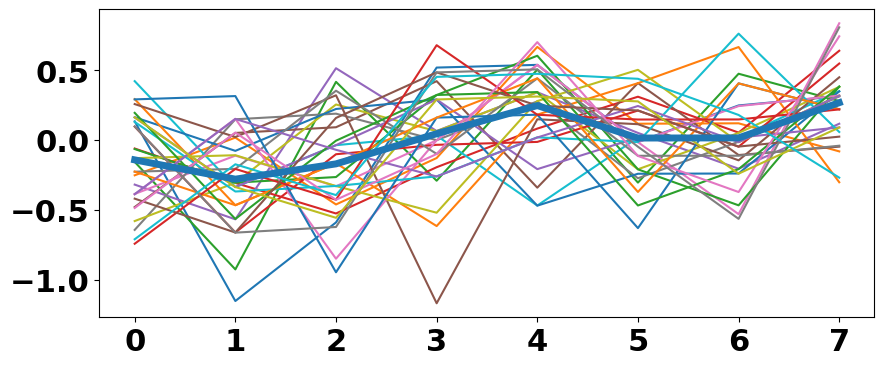

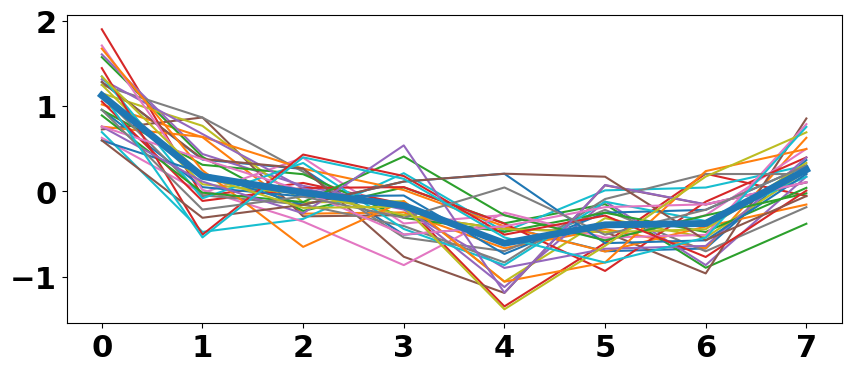

In [6]:
#%matplotlib widget
plt.figure()
for d in D.image_data.data:
    plt.plot(d[:,0]-np.mean(d[:,0]))
plt.plot(D.stacked_data.data[:,0]-np.mean(D.stacked_data.data[:,0]), lw=5)
plt.figure()
for d in D.image_data.data:
    plt.plot(d[:,-1]-np.mean(d[:,-1]))
plt.plot(D.stacked_data.data[:,-1]-np.mean(D.stacked_data.data[:,-1]), lw=5)

# Initial conditions and expected values:

In [9]:
import imagehandler
importlib.reload(imagehandler)
import glob
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::1]
print(f"{len(filenames)} files")
#print(' '.join(filenames))

1108 files


# Dorothea
mag=13.7

0
Combining images using mean stacking
1
(1113, 300, 1200)
2
2.5
[[ 47 889]
 [ 47 888]
 [ 47 888]
 ...
 [ 18   1]
 [ 18   1]
 [ 18   0]]
3
4
Combining images using median stacking.
5
Done!
6
[ 189 1066]
8
(347, 2089)
9
Done!
Done!
Peak count $\pm$ noise = 232.5 $\pm$  1.6 (147.4$\sigma$)


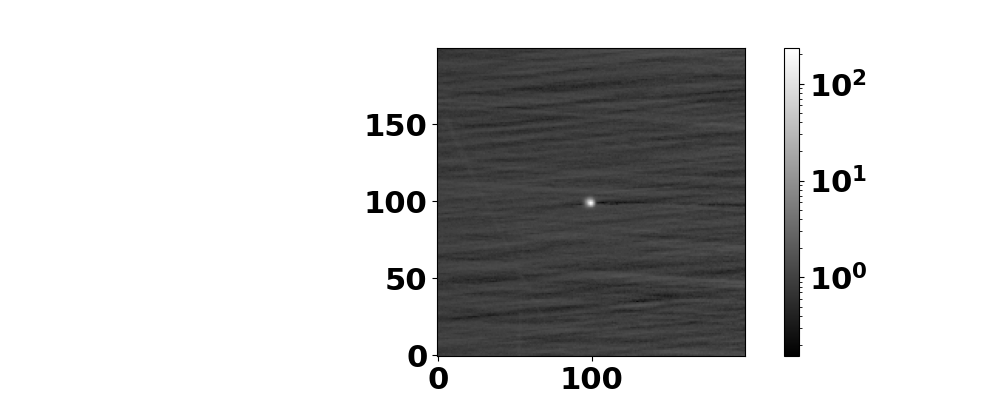

In [13]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1200, 1500, 700, 1900])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i] -= unshifted_stack
print(1)
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='Dorothea', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Dorothea_jpl.fits')
print(6)
xy0 = np.array([142, 177]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_shifted('shift_Tess_Dorothea_jpl')
D.save_stack('shift+stack_Tess_Dorothea_jpl.fits')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

# 2001 PM14
mag = 18.8

0
Combining images using mean stacking
1
(1113, 300, 1000)
2
2.5
[[  2 734]
 [  2 733]
 [  2 733]
 ...
 [ 50   1]
 [ 51   0]
 [ 51   0]]
3
4
Combining images using median stacking.
5
Done!
6
[166 863]
8
(351, 1734)
9
Done!
Done!
Peak count $\pm$ noise =  2.4 $\pm$  0.1 (21.1$\sigma$)


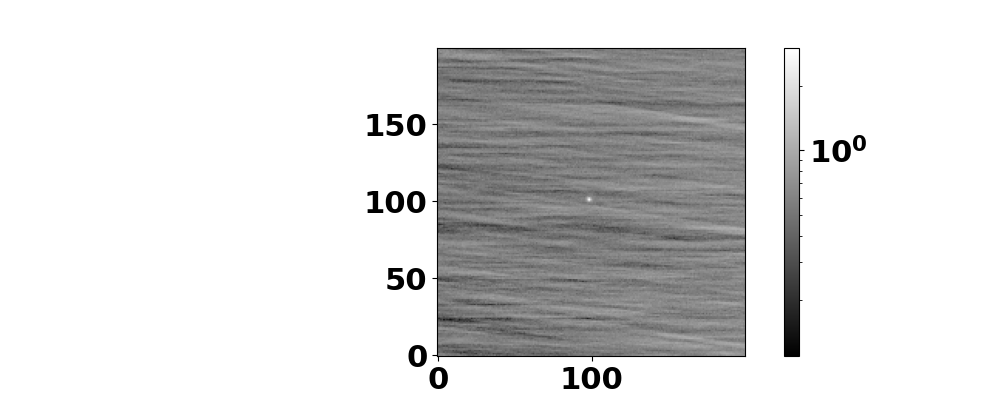

In [14]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1200, 1500, 300, 1300])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i] -= unshifted_stack
print(1)
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='2001 PM14', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_2001PM14_jpl.fits')
print(6)
xy0 = np.array([164, 129]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_stack('shift+stack_Tess_2001PM14_jpl.fits')
D.save_shifted('shift_Tess_2001PM14_jpl')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

In [71]:
importlib.reload(imagehandler)
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::1]
print(f"{len(filenames)} files")
#print(' '.join(filenames))

1113 files


In [ ]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1200, 1500, 300, 1300])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i] -= unshifted_stack
print(1)
#idx=(unshifted_stack-np.median(unshifted_stack)>np.nanmean(np.std(D.image_data.data,0))*3)
#for i, d in enumerate(D.image_data.data):
#    D.image_data.data[i][idx] = np.nan
#print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='2001 PM14', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
#print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_2001PM14_jpl.fits')
print(6)
xy0 = np.array([164, 129]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_stack('shift+stack_Tess_2001PM14_jpl.fits')
D.save_shifted('shift_Tess_2001PM14_jpl')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

Reading image 1112: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018345002937-s0005-1-4-0125-s_ffic.fits
Read 1113 files!
0
Combining images using mean stacking
1
(1113, 300, 1000)
2
2.5
3
4
Combining images using median stacking.
5

Done!
6
[166 863]
8
(351, 1734)
9

Done!


In [75]:
np.mean(unshifted_stack)

194.69966

In [74]:
np.median(unshifted_stack)

152.50905

In [84]:
np.nanmean(np.std(D.image_data.data,0))

2.7495801

In [86]:
np.mean(unshifted_stack-np.median(unshifted_stack))

42.190624

In [87]:
np.median(unshifted_stack-np.mean(unshifted_stack))

-42.190613

# 2014 OV95
mag = 19.2

In [35]:
importlib.reload(imagehandler)
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::10]
print(f"{len(filenames)} files")
#print(' '.join(filenames))

112 files


Reading image 111: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018344232937-s0005-1-4-0125-s_ffic.fits
Read 112 files!
0
Combining images using mean stacking

Done!
1
(112, 470, 1020)
2
2.5
3
4
Combining images using median stacking.
5

Done!

Done!
6
[350 909]
7
8
(702, 1814)
9
Peak count $\pm$ noise =  1.3 $\pm$  0.3 ( 4.8$\sigma$)


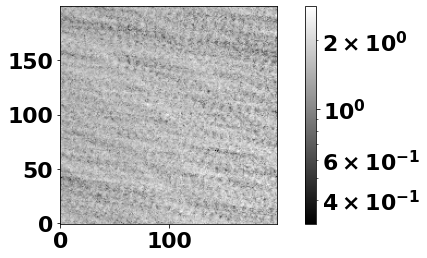

In [51]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[880, 1350, 630, 1650])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
D.save_stack('stack_Tess_2014OV95_jpl.fits')
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i] -= unshifted_stack
print(1)
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i][unshifted_stack-np.mean(unshifted_stack)>5] = np.nan
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='2014 OV95', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
#print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack('shift+stack_Tess_2014OV95_jpl.fits')
D.save_shifted('shift_Tess_2014OV95_jpl')
print(6)
xy0 = np.array([350, 115]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(7)
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

In [42]:
np.sum(unshifted_stack-np.mean(unshifted_stack)>np.std(unshifted_stack)*1)

2504

In [43]:
np.mean(unshifted_stack)

198.6059

In [44]:
unshifted_stack-np.mean(unshifted_stack)

array([[-40.22441 , -37.839706, -31.433014, ..., -25.996552, -35.00615 ,
        -57.917694],
       [-40.028793, -38.542526, -34.208282, ..., -51.62558 , -54.649734,
        -59.387054],
       [-39.2238  , -37.464706, -33.868683, ..., -56.9032  , -58.53665 ,
        -59.712936],
       ...,
       [-47.12445 , -48.152573, -46.334442, ..., -58.76924 , -58.376633,
        -57.853683],
       [-49.318817, -49.471252, -46.526947, ..., -57.76375 , -58.202667,
        -58.644684],
       [-50.485626, -49.21382 , -44.875137, ..., -57.45482 , -58.01584 ,
        -58.34874 ]], dtype=float32)

In [66]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[880, 1350, 630, 1650])
np.nanstd(np.mean(D.image_data.data,0))

Reading image 111: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018344232937-s0005-1-4-0125-s_ffic.fits
Read 112 files!


1100.6831

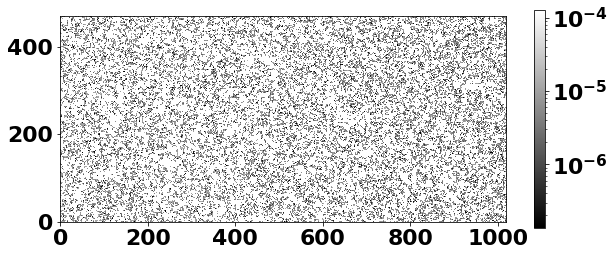

In [65]:
plt.imshow(a, origin='lower', cmap='gray',norm=LogNorm())
cbar = plt.colorbar()

In [27]:
importlib.reload(imagehandler)
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::100]
print(f"{len(filenames)} files")
print(' '.join(filenames))

12 files
/arc/home/mikea/.shifty_data/tess/5/1/4/tess2018319225938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018322005938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018324032938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018326055938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018328075938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018330102938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018334065938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018336092938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018338112938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018340135938-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018342162937-s0005-1-4-0125-s_ffic.fits /arc/home/mikea/.shifty_data/tess/5/1/4/tess201834418293

In [18]:
importlib.reload(imagehandler)
E=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[880, 1350, 630, 1650])
print(0)

0


In [19]:
import copy
EE=copy.deepcopy(E)

In [20]:
E.image_data.reproject_data2(padmean=True)

[[-5.82061763e-08  3.66276587e-09]]
[[-5.82061763e-08  3.66276587e-09]
 [ 1.30721896e-03  3.59911566e-02]]
[[-5.82061763e-08  3.66276587e-09]
 [ 1.30721896e-03  3.59911566e-02]
 [-3.07601703e-03  6.40854572e-02]]
[[-5.82061763e-08  3.66276587e-09]
 [ 1.30721896e-03  3.59911566e-02]
 [-3.07601703e-03  6.40854572e-02]
 [-8.01545366e-03  8.89910291e-02]]
[[-5.82061763e-08  3.66276587e-09]
 [ 1.30721896e-03  3.59911566e-02]
 [-3.07601703e-03  6.40854572e-02]
 [-8.01545366e-03  8.89910291e-02]
 [-1.53593186e-02  1.13384378e-01]]
[[-5.82061763e-08  3.66276587e-09]
 [ 1.30721896e-03  3.59911566e-02]
 [-3.07601703e-03  6.40854572e-02]
 [-8.01545366e-03  8.89910291e-02]
 [-1.53593186e-02  1.13384378e-01]
 [-2.71621448e-02  1.38730854e-01]]
[[-5.82061763e-08  3.66276587e-09]
 [ 1.30721896e-03  3.59911566e-02]
 [-3.07601703e-03  6.40854572e-02]
 [-8.01545366e-03  8.89910291e-02]
 [-1.53593186e-02  1.13384378e-01]
 [-2.71621448e-02  1.38730854e-01]
 [-4.78520562e-03  1.60826520e-01]]
[[-5.82061763

In [16]:
imagehandler.save_fits(E.image_data, 'reproj.fits')

Saving to file reproj_011.fits
Done!


In [68]:
F=copy.deepcopy(EE)

In [70]:
F.image_data.reproject_data3(padmean=True)

((0, 0), (0, 0))
((0, 0), (0, 0))ge 0
WCS Keywords image 1

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 59.81331586463679  8.771077415332606  
CRPIX : 415.0  121.0  
CD1_1 CD1_2  : -0.005613516819  0.0009527071021780164  
CD2_1 CD2_2  : -0.001088932588437  -0.005632822854293  
NAXIS : 470  1020 WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 59.81332126047179  8.771054453267954  
CRPIX : 415.0  121.0  
CD1_1 CD1_2  : -0.005613496238332  0.0009527105329250868  
CD2_1 CD2_2  : -0.00108893311113  -0.005632803289913  
NAXIS : 470  1020 [[158.01924 160.7094  167.09608 ... 183.56747 168.87314 144.63705]
 [158.41806 160.22195 164.39883 ... 153.11012 149.07477 143.71696]
 [159.66466 160.60071 164.18867 ... 146.6977  144.42241 143.61104]
 ...
 [152.14488 150.43048 152.05994 ... 142.82364 143.0911  144.06389]
 [149.23682 148.67355 152.33089 ... 143.7958  143.02754 143.68668]
 [147.95392 149.14134 153.41884 ... 144.52707 144.25931 14

In [59]:
EE_reprojected=copy.deepcopy(E)

In [60]:
E.stack(shifted=False, median_combine=False)
unshifted_stack = E.stacked_data.data

Combining images using mean stacking


In [61]:
for i, d in enumerate(E.image_data.data):
    E.image_data.data[i] -= unshifted_stack
print(1)
print(np.shape(E.image_data.data))

1
(30, 470, 1020)


In [62]:
print(2)
shifts = E._calculate_shifts_from_known(object_name='2014 OV95', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
E.integer_shift(shifts, padmean=True)
print(4)
E.stack(shifted=True, median_combine=True)
print(5)
E.save_stack('shift+stack_Tess_2014OV95_jpl_B.fits')
E.save_shifted('shift_Tess_2014OV95_jpl_B')

2
2.5
[[  0 346]
 [  0 335]
 [  0 323]
 [  1 311]
 [  2 298]
 [  3 286]
 [  4 273]
 [  5 260]
 [  7 248]
 [  9 234]
 [ 10 222]
 [ 12 209]
 [ 14 197]
 [ 16 185]
 [ 18 172]
 [ 20 160]
 [ 22 148]
 [ 24 136]
 [ 26 123]
 [ 29 111]
 [ 31  99]
 [ 33  88]
 [ 36  76]
 [ 38  65]
 [ 40  54]
 [ 43  43]
 [ 45  32]
 [ 47  21]
 [ 50  10]
 [ 52   0]]
3
4
Combining images using median stacking.
5
Done!
Done!


6
[350 461]
7
8
(522, 1366)
9
Peak count $\pm$ noise =  1.5 $\pm$  0.1 (12.5$\sigma$)


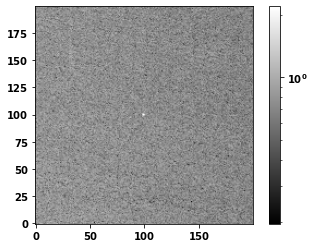

In [63]:
print(6)
xy0 = np.array([350, 115]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(7)
print(8)
plt.figure()
print(np.shape(E.stacked_data.data))
plt.imshow((E.stacked_data.data-np.nanmin(E.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
cbar = plt.colorbar()
counts_above_background = (E.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(E.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

# 2001 SH324
mag = 19.8

0
Combining images using mean stacking
1
(1113, 300, 1100)
2
2.5
[[  0 795]
 [  0 794]
 [  0 794]
 ...
 [171   1]
 [171   0]
 [172   0]]
3
4
Combining images using median stacking.
5
Done!
6
[129 953]
8
(472, 1895)
9
Done!
Done!
Peak count $\pm$ noise =  0.4 $\pm$  0.2 ( 2.3$\sigma$)


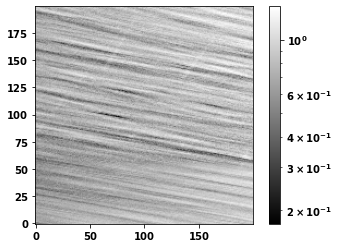

In [8]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1000, 1300, 500, 1600])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i] -= unshifted_stack
print(1)
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='2001 SH324', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_2001SH324_jpl.fits')
print(6)
xy0 = np.array([129, 158]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_shifted('shift_Tess_2001SH324_jpl')
D.save_stack('shift+stack_Tess_2001SH324_jpl.fits')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')


# Sedna
mag = 20.7

In [4]:
importlib.reload(imagehandler)
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::1]
print(f"{len(filenames)} files")
#print(' '.join(filenames))

1108 files


Reading image 1107: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018345002937-s0005-1-4-0125-s_ffic.fits
Read 1108 files!
0
Combining images using mean stacking
1
(1108, 250, 300)
2
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!
6
[143 148]
8
(251, 345)
9

Done!

Done!


ValueError: zero-size array to reduction operation maximum which has no identity

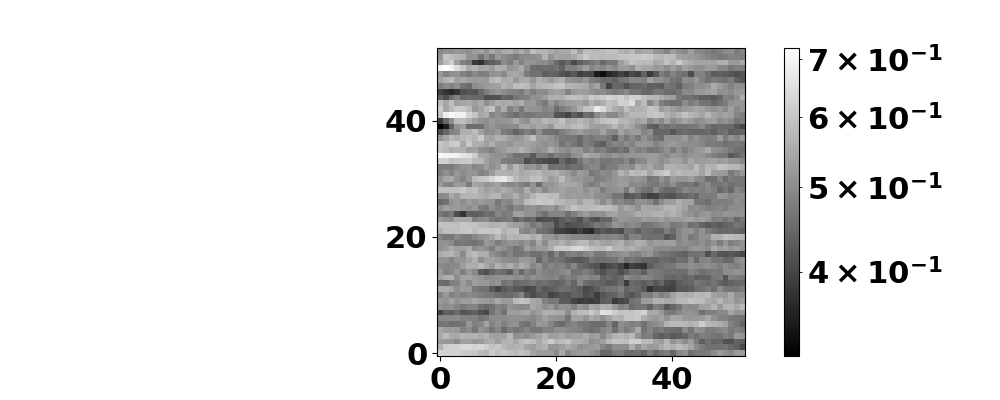

In [37]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1000, 1250, 1400, 1700])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
usmed = np.nanmedian(unshifted_stack)
usstd = np.nanmean(np.nanstd(D.image_data.data,0))
idx = ((unshifted_stack < usmed - 1*usstd) | (unshifted_stack > usmed + 1*usstd))
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i][idx] = np.nan
    D.image_data.data[i] -= unshifted_stack
    D.image_data.data[i] -= np.nanmedian(D.image_data.data[i])
print(1)
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl.fits')
print(6)
xy0 = np.array([143, 103]) + shifts[0]
print(xy0)
xym = xy0 - 26
xyp = xy0 + 27
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_stack('shift+stack_Tess_Sedna_jpl.fits')
D.save_shifted('shift_Tess_Sedna_jpl')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

Reading image 1107: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018345002937-s0005-1-4-0125-s_ffic.fits
Read 1108 files!
0
Combining images using mean stacking
1107
(1108, 250, 300)
2
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!
6
[143 148]
8
(251, 345)
9

Done!

Done!
Peak count $\pm$ noise =  1.0 $\pm$  1.0 ( 1.1$\sigma$)


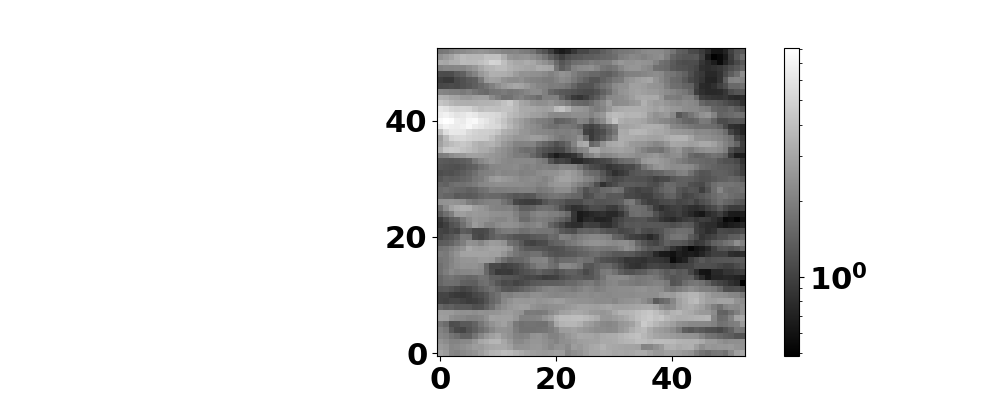

In [32]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1000, 1250, 1400, 1700])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
nimag = len(D.image_data.data)
for i, d in enumerate(D.image_data.data):
    print(i, end='\r')
    i_min = np.max([0, i-100])
    i_max = np.min([i+100, nimag])
    runmed = np.nanmedian(D.image_data.data[i_min:i_max], 0)
    D.image_data.data[i] -= runmed
print(1)
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl.fits')
print(6)
xy0 = np.array([143, 103]) + shifts[0]
print(xy0)
xym = xy0 - 26
xyp = xy0 + 27
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_stack('shift+stack_Tess_Sedna_jpl.fits')
D.save_shifted('shift_Tess_Sedna_jpl')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[20:-20,20:-20])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

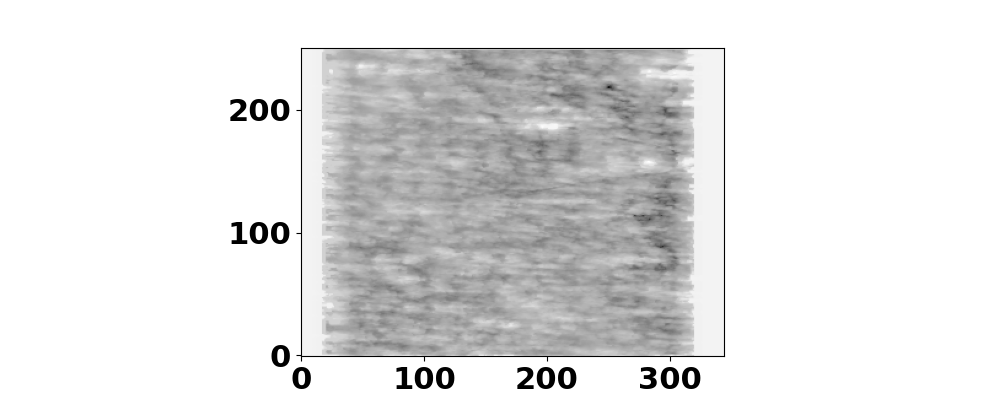

In [34]:
%matplotlib widget
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data)), origin='lower', cmap='gray', norm=LogNorm())

[188 102]
8
(251, 345)
9

Done!

Done!
Peak count $\pm$ noise =  1.6 $\pm$  1.1 ( 1.5$\sigma$)


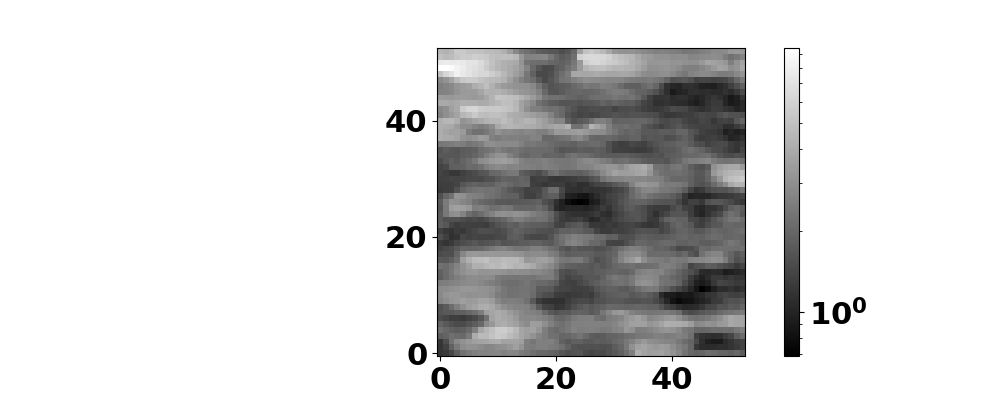

In [36]:
xy0 = np.array([188, 102])
print(xy0)
xym = xy0 - 26
xyp = xy0 + 27
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_stack('shift+stack_Tess_Sedna_jpl.fits')
D.save_shifted('shift_Tess_Sedna_jpl')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[20:-20,20:-20])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')
plt.show()

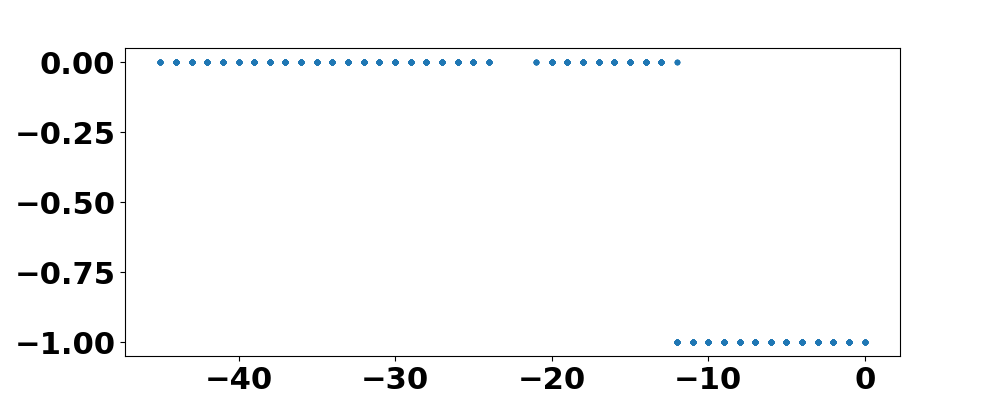

[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]


In [22]:
plt.figure()
plt.plot(-shifts[:,1], -shifts[:,0], '.')
plt.show()
print(shifts)

# 2009 DE69
mag = 21 (fainter than Sedna!)

0
Combining images using mean stacking
1
(1113, 300, 1300)
2
[[ 0.00000000e+00  0.00000000e+00]
 [-1.41331097e-01 -9.30521408e-01]
 [-2.79352336e-01 -1.86264739e+00]
 ...
 [ 6.55342061e+01 -1.07781257e+03]
 [ 6.56349156e+01 -1.07834711e+03]
 [ 6.57336861e+01 -1.07888052e+03]]
2.5
[[  17 1079]
 [  17 1078]
 [  17 1077]
 ...
 [  83    1]
 [  83    1]
 [  83    0]]
3
4
Combining images using median stacking.
5
Done!
6
7
[ 210 1264]
8
(383, 2379)
9
Done!
Done!
Peak count $\pm$ noise =  0.5 $\pm$  0.6 ( 0.9$\sigma$)
10


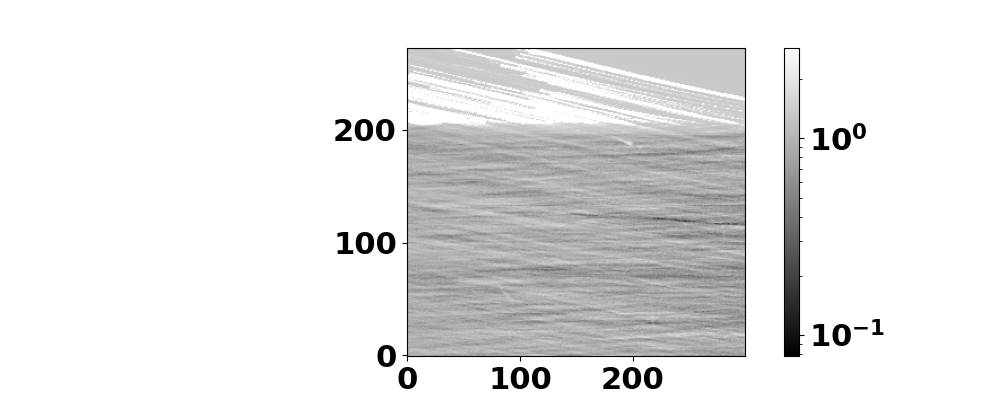

In [12]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1150, 1450, 700, 2000])
print(0)
D.stack(shifted=False, median_combine=False)
unshifted_stack = D.stacked_data.data
for i, d in enumerate(D.image_data.data):
    D.image_data.data[i] -= unshifted_stack
print(1)
print(np.shape(D.image_data.data))
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
print(2)
shifts = D._calculate_shifts_from_known(object_name='2009 DE69', obs_code='500@-95')
print(shifts)
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_2009DE69_jpl.fits')
print(6)
#D.save_shifted('shift_Tess_2009DE69_jpl')
print(7)
xy0 = np.array([193, 185]) + shifts[0]
print(xy0)
xym = xy0 - 100
xyp = xy0 + 200
print(8)
plt.figure()
print(np.shape(D.stacked_data.data))
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
D.save_shifted('shift_Tess_2009DE69_jpl')
D.save_stack('shift+stack_Tess_2009DE69_jpl.fits')
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')
print(10)

The thing you see there in top right is not 2009 DE69, it's some other unknown asteroid that happens to be nearby.
I'd guess mag=19-ish
Also vissible is the smeared out signal of Dorothea, mag=13.7

### Now with thetas/shifts calculated from ABG

In [ ]:
# 2012 TF315
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import imagehandler
importlib.reload(imagehandler)
import glob
xxx=[]
ppp=[]
for iii in np.arange(0,25):
    filenames=sorted(glob.glob('/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[iii::25]
    '''
    Get times and shifts (as calculated by Horizons)
    '''
    importlib.reload(imagehandler)
    D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                               MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
    shifts = D._calculate_shifts_from_known(object_name='2012 TF315', obs_code='500@-95')
    times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
    print(len(times))
    D.integer_shift(shifts, padmean=True)
    D.stack(shifted=False, median_combine=True)
    D.save_stack(f'Tess_{len(times)}images_stack{iii}.fits')
    unshifted_stack = D.stacked_data.data
    
    for d in D.image_data.data:
        d -= unshifted_stack  
    '''
    Shift+stack using the known (from Horizons + WCS) shifts.
    '''
    shiftss=shifts.copy()
    shifts[:,1]=shiftss[:,1]
    shifts[:,0]=shiftss[:,0]
    D.integer_shift(shifts, padmean=True)
    D.stack(shifted=True, median_combine=True)
    D.save_stack(f'shift+stack_Tess_2012TF315_jpl{iii}.fits')
    xy0 = np.array([848, 1023]) - np.min(shifts,0).astype(int)
    print(xy0)
    xxx.append(xy0)
    xym = xy0 - 100
    xyp = xy0 + 100
    counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
    peak_count = np.max(counts_above_background[80:120,80:120])
    noise = np.std(counts_above_background)
    sigma = peak_count / noise
    print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')
    ppp.append([peak_count, noise, sigma])

for i, x in enumerate(xxx):
    print(x)
    print(ppp[i])

In [31]:
D.image_data.header[0]['old_NAXIS2']

2078

'/arc/home/mikea/.shifty_data/tess/5/1/4/tess2018319225938-s0005-1-4-0125-s_ffic.fits'

In [206]:
import copy
importlib.reload(imagehandler)
E=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[880, 1350, 630, 1650])
print(0)

E.image_data.reproject_data2(padmean=True)  # Reproject to line up perfectly
imagehandler.save_fits(E.image_data, 'Repro.fits')

for i in tnrange(0, len(E.image_data.data)):  # Subtract median (make bg ~0)
    E.image_data.data[i] -= np.nanmedian(E.image_data.data[i])
imagehandler.save_fits(E.image_data, 'ReproBgsub.fits')

E1=copy.deepcopy(E)
E2=copy.deepcopy(E)

Reading image 1107: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018345002937-s0005-1-4-0125-s_ffic.fits
Read 1108 files!
0
Reprojecting image 1107
Done
4
Saving to file Repro_1107.fits
Done!


  0%|          | 0/1108 [00:00<?, ?it/s]

4
Saving to file ReproBgsub_1107.fits
Done!


In [207]:
import glob
RB_files=sorted(glob.glob('./ReproBgsub_*.fits'))
print(len(RB_files), "files")
E1=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
median_stack = np.nanmedian(E1.image_data.data, 0)
for i in tnrange(0, len(E1.image_data.data)):  # Subtract median of all images
    E1.image_data.data[i] -= median_stack
imagehandler.save_fits(E1.image_data, 'ReproBgsubMsuba.fits')

1108 files
Reading image 1107: ./ReproBgsub_1107.fits
Read 1108 files!


  0%|          | 0/1108 [00:00<?, ?it/s]

4
Saving to file ReproBgsubMsuba_1107.fits
Done!


In [6]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsub_*.fits'))[:547]
print(len(RB_files), "files")
E2=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
data = copy.deepcopy(E2.image_data.data)
for i in tnrange(0, len(E2.image_data.data)):  # Subtract median of nearby images only
    if i<25:
        i_mid2 = i + 25
        i_max = i + 25 + 150
        E2.image_data.data[i] -= np.nanmedian(data[i_mid2:i_max], 0)
    elif i<100:
        i_min = np.max([0, i - 100])
        i_mid1 = np.max([0, i - 25])
        remainder = 150 - (i_mid1 - i_min)
        i_mid2 = np.min([i + 25, len(data)])
        i_max = np.min([i + 25 + remainder, len(data)])
        E2.image_data.data[i] -= np.nanmedian(list(data[i_min:i_mid1]) + list(data[i_mid2:i_max]), 0)
    elif i>=(len(data) - 25):
        i_min = i - 25 - 150
        i_mid1 = i - 25
        E2.image_data.data[i] -= np.nanmedian(data[i_min:i_mid1], 0)
    elif i>=(len(data) - 100):
        i_mid2 = np.min([i + 25, len(data)])
        i_max = np.min([i + 100, len(data)])
        remainder = 150 - (i_max - i_mid2)
        i_min = np.max([0, i - 25 - remainder])
        i_mid1 = np.max([0, i - 25])
        E2.image_data.data[i] -= np.nanmedian(list(data[i_min:i_mid1]) + list(data[i_mid2:i_max]), 0)
    else:
        i_min = np.max([0, i - 100])
        i_mid1 = np.max([0, i - 25])
        i_mid2 = np.min([i + 25, len(data)])
        i_max = np.min([i + 100, len(data)])
        E2.image_data.data[i] -= np.nanmedian(list(data[i_min:i_mid1]) + list(data[i_mid2:i_max]), 0)
    hdu = fits.PrimaryHDU(data=E2.image_data.data[i],
                          header=E2.image_data.header[i])
    hdu.writeto(f'ReproBgsubMsubn_{i:04.0f}.fits', overwrite=True)
n_first_half = len(data)

RB_files=sorted(glob.glob('./ReproBgsub_*.fits'))[547:]
print(len(RB_files), "files")
E2=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
data = copy.deepcopy(E2.image_data.data)
for i in tnrange(0, len(E2.image_data.data)):  # Subtract median of nearby images only
    if i<25:
        i_mid2 = i + 25
        i_max = i + 25 + 150
        E2.image_data.data[i] -= np.nanmedian(data[i_mid2:i_max], 0)
    elif i<100:
        i_min = np.max([0, i - 100])
        i_mid1 = np.max([0, i - 25])
        remainder = 150 - (i_mid1 - i_min)
        i_mid2 = np.min([i + 25, len(data)])
        i_max = np.min([i + 25 + remainder, len(data)])
        E2.image_data.data[i] -= np.nanmedian(list(data[i_min:i_mid1]) + list(data[i_mid2:i_max]), 0)
    elif i>=(len(data) - 25):
        i_min = i - 25 - 150
        i_mid1 = i - 25
        E2.image_data.data[i] -= np.nanmedian(data[i_min:i_mid1], 0)
    elif i>=(len(data) - 100):
        i_mid2 = np.min([i + 25, len(data)])
        i_max = np.min([i + 100, len(data)])
        remainder = 150 - (i_max - i_mid2)
        i_min = np.max([0, i - 25 - remainder])
        i_mid1 = np.max([0, i - 25])
        E2.image_data.data[i] -= np.nanmedian(list(data[i_min:i_mid1]) + list(data[i_mid2:i_max]), 0)
    else:
        i_min = np.max([0, i - 100])
        i_mid1 = np.max([0, i - 25])
        i_mid2 = np.min([i + 25, len(data)])
        i_max = np.min([i + 100, len(data)])
        E2.image_data.data[i] -= np.nanmedian(list(data[i_min:i_mid1]) + list(data[i_mid2:i_max]), 0)
    hdu = fits.PrimaryHDU(data=E2.image_data.data[i],
                          header=E2.image_data.header[i])
    hdu.writeto(f'ReproBgsubMsubn_{i+n_first_half:04.0f}.fits', overwrite=True)
print('Done!')

547 files
Reading image 546: ./ReproBgsub_0546.fits
Read 547 files!


  0%|          | 0/547 [00:00<?, ?it/s]

561 files
Reading image 560: ./ReproBgsub_1107.fits
Read 561 files!


  0%|          | 0/561 [00:00<?, ?it/s]

Done!


In [208]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsub_*.fits'))
print(len(RB_files), "files")
E2=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
data = copy.deepcopy(E2.image_data.data)
for i in tnrange(0, len(E2.image_data.data)):  # Subtract median of nearby images only
    i_min = np.max([0, i-100])
    i_max = np.min([i+100, len(data)])
    #runmed = np.nanmedian(data[i_min:i_max], 0)
    #print(i_min, i_max, runmed[0:1], end='\r')
    E2.image_data.data[i] -= np.nanmedian(data[i_min:i_max], 0)
    hdu = fits.PrimaryHDU(data=E2.image_data.data[i],
                          header=E2.image_data.header[i])
    hdu.writeto(f'ReproBgsubMsubl_{i:0{len(str(len(data)))}.0f}.fits', overwrite=True)
#imagehandler.save_fits(E2.image_data, 'ReproBgsubMsubl.fits')

1108 files
Reading image 1107: ./ReproBgsub_1107.fits
Read 1108 files!


  0%|          | 0/1108 [00:00<?, ?it/s]

In [7]:
import imagehandler
importlib.reload(imagehandler)
import glob
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::1]
print(f"{len(filenames)} files")
#print(' '.join(filenames))

1108 files


In [9]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsubMsubl_*.fits'))
print(len(RB_files), "files")
E3=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
data = copy.deepcopy(E3.image_data.data)
for i in tnrange(0, len(E3.image_data.data)):  # Subtract median of nearby images only
    dmed = np.nanmedian(data[i])
    dstd = np.nanstd(data[i],0)
    idx = ((data[i] < dmed - 3 * dstd) | (data[i] > dmed + 3 * dstd))
    E3.image_data.data[i][idx] = dmed
    hdu = fits.PrimaryHDU(data=E3.image_data.data[i],
                          header=E3.image_data.header[i])
    hdu.writeto(f'ReproBgsubMsublMask_{i:0{len(str(len(data)))}.0f}.fits', overwrite=True)

1108 files
Reading image 1107: ./ReproBgsubMsubl_1107.fits
Read 1108 files!


  0%|          | 0/1108 [00:00<?, ?it/s]

In [10]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsubMsubl_*.fits'))
print(len(RB_files), "files")
D=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl_Msubl.fits')

1108 files
Reading image 1107: ./ReproBgsubMsubl_1107.fits
Read 1108 files!
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!


In [11]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsubMsublMask_*.fits'))
print(len(RB_files), "files")
D=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl_Mask.fits')

1108 files
Reading image 1107: ./ReproBgsubMsublMask_1107.fits
Read 1108 files!
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!


In [12]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsubMsuba_*.fits'))
print(len(RB_files), "files")
D=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl_Msuba.fits')

1108 files
Reading image 1107: ./ReproBgsubMsuba_1107.fits
Read 1108 files!
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!


In [13]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsub_*.fits'))
print(len(RB_files), "files")
D=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl_Bgsub.fits')

1108 files
Reading image 1107: ./ReproBgsub_1107.fits
Read 1108 files!
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!


In [14]:
import glob
import copy
RB_files=sorted(glob.glob('./Repro_*.fits'))
print(len(RB_files), "files")
D=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl_Repro.fits')

1108 files
Reading image 1107: ./Repro_1107.fits
Read 1108 files!
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!


In [7]:
import glob
import copy
RB_files=sorted(glob.glob('./ReproBgsubMsubn_*.fits'))
print(len(RB_files), "files")
D=imagehandler.DataHandler(RB_files, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                            MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                            )
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
print(2.5)
shiftss=shifts.copy()
shiftss[:, 0] -= shifts[:, 0].min()
shiftss[:, 1] -= shifts[:, 1].min()
shifts = np.array(shiftss).round(0).astype(int)
print(shifts)
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_Sedna_jpl_Msubn.fits')

1113 files
Reading image 1112: ./ReproBgsubMsubn_408.fitss
Read 1113 files!
2.5
[[ 0 45]
 [ 0 45]
 [ 0 45]
 ...
 [ 1  0]
 [ 1  0]
 [ 1  0]]
3
4
Combining images using median stacking.
5

Done!
